In [1]:
import pandas as pd
from fbprophet import Prophet

In [2]:
df = pd.read_csv('../../data/cleaned/weekseries_04_18.csv')
df.rename({'acc_nr':'y'}, axis=1, inplace=True)
len(df), df.head(), df.tail()

(783,            ds    y
 0  2004-01-04  142
 1  2004-01-11  263
 2  2004-01-18  291
 3  2004-01-25  222
 4  2004-02-01  277,              ds    y
 778  2018-12-02  261
 779  2018-12-09  274
 780  2018-12-16  275
 781  2018-12-23  234
 782  2018-12-30  150)

In [3]:
m = Prophet(yearly_seasonality=52) #daily_seasonality=True) #, weekly_seasonality=True)
m.add_country_holidays(country_name='US')
m.fit(df)
m.train_holiday_names

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


0                  New Year's Day
1     Martin Luther King, Jr. Day
2           Washington's Birthday
3                    Memorial Day
4                Independence Day
5                       Labor Day
6                    Columbus Day
7                    Veterans Day
8                    Thanksgiving
9                   Christmas Day
10       Christmas Day (Observed)
11      New Year's Day (Observed)
12        Veterans Day (Observed)
13    Independence Day (Observed)
dtype: object

In [4]:
future = m.make_future_dataframe(periods=20,freq='W',include_history=True)
future.head(2)

,ds
0,2004-01-04
1,2004-01-11


In [5]:
forecast = m.predict(future)
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'Christmas Day', 'Christmas Day_lower', 'Christmas Day_upper',
       'Christmas Day (Observed)', 'Christmas Day (Observed)_lower',
       'Christmas Day (Observed)_upper', 'Columbus Day', 'Columbus Day_lower',
       'Columbus Day_upper', 'Independence Day', 'Independence Day_lower',
       'Independence Day_upper', 'Independence Day (Observed)',
       'Independence Day (Observed)_lower',
       'Independence Day (Observed)_upper', 'Labor Day', 'Labor Day_lower',
       'Labor Day_upper', 'Martin Luther King, Jr. Day',
       'Martin Luther King, Jr. Day_lower',
       'Martin Luther King, Jr. Day_upper', 'Memorial Day',
       'Memorial Day_lower', 'Memorial Day_upper', 'New Year's Day',
       'New Year's Day_lower', 'New Year's Day_upper',
       'New Year's Day (Observed)', 'New Year's Day (Observed)_lower',
       'New Year's Day (Observed)_upper', 'Thanksgiving', 'Thanksgiving_lower',
       

In [6]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'additive_terms','holidays_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper,additive_terms,holidays_upper
798,2019-04-21,199.733478,171.126354,230.485456,-19.328818,0.0
799,2019-04-28,209.506701,181.171775,240.396856,-9.368220,0.0
800,2019-05-05,228.582764,199.224527,257.271427,9.895218,0.0
801,2019-05-12,222.218234,191.602850,252.790286,3.718062,0.0
802,2019-05-19,222.576230,193.316279,251.727711,4.263433,0.0


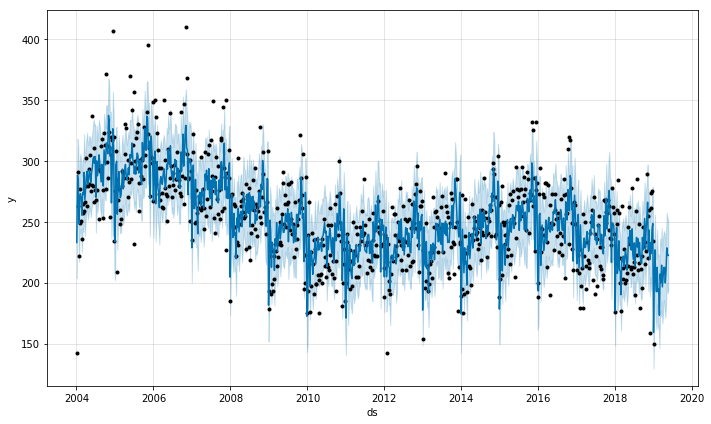

In [7]:
fig1 = m.plot(forecast)

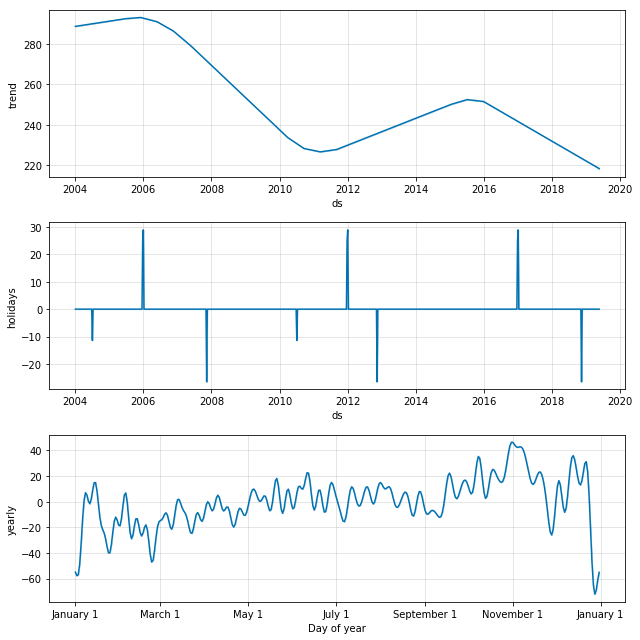

In [8]:
fig2 = m.plot_components(forecast)

In [9]:
import matplotlib.pyplot as plt

baseline

In [10]:
y_act_18 = df['y'][-52:]
y_base_19 = [y_act_18.mean()]*20

In [23]:
# x = forecast.index.values[-20:]
x=range(1,21)
y = forecast['yhat'][-20:]
y_low = forecast['yhat_lower'][-20:]
y_up = forecast['yhat_upper'][-20:]


In [24]:
df_act = pd.read_csv('../../data/cleaned/weekseries_19.csv')
yr = df_act.acc_nr.values[:20]

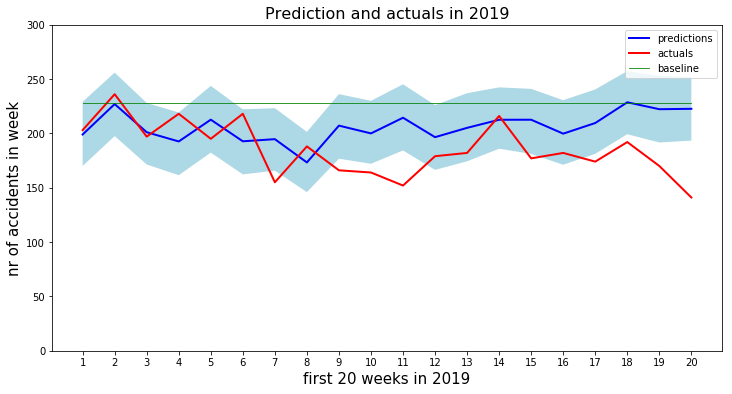

In [46]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(x,y, 'b-', label='predictions', lw=2)
# ax.plot(x,y_up, 'b-', label='upper', lw=0.3)
# ax.plot(x,y_low, 'b-', label='lower', lw=0.3)
ax.fill_between(x, y_low, y_up, facecolor='lightblue')
ax.plot(x,yr, 'r-', label='actuals', lw=2)
ax.plot(x,y_base_19, 'g-', label='baseline', lw=0.8)
ax.set_xticks(x)
ax.set_xlabel('first 20 weeks in 2019', fontsize=15)
ax.set_ylabel('nr of accidents in week', fontsize=15)
ax.set_ylim(0,300)
ax.set_title('Prediction and actuals in 2019', fontsize=16)
ax.legend()

In [26]:
# import seaborn as sns; sns.set()
# # fmri = sns.load_dataset("fmri")
# ax = sns.lineplot(x=range(1,21), y="yhat", data= forecast[-20:])
# ax.set_ylim(0,300)

In [27]:
from sklearn.metrics import mean_squared_error
print('MSE to actuals:', mean_squared_error(y,yr))
print('MSE to baseline:', mean_squared_error(y_base_19, yr))

MSE to actuals: 1239.2485042804478
MSE to baseline: 2397.138091715977


In [28]:
e_p = [mean_squared_error(y[:i],yr[:i]) for i in range(1,len(yr)+1)]
e_b = [mean_squared_error(y_base_19[:i], yr[:i]) for i in range(1,len(yr)+1)]
bp_ratio = [e_p[i]/e_b[i] for i in range(len(yr))]

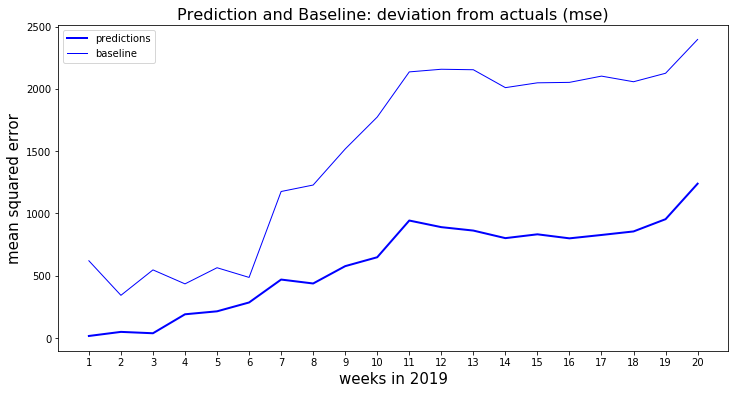

In [43]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(x,e_p, 'b-', label='predictions', lw=2)
ax.plot(x,e_b, 'b-', label='baseline', lw=1)
ax.set_xlabel('weeks in 2019', fontsize=15)
ax.set_ylabel('mean squared error', fontsize=15)
ax.set_xticks(x)
ax.set_title('Prediction and Baseline: deviation from actuals (mse)', fontsize=16)
ax.legend()

In [30]:
for i in range(1,len(yr)+1):   
    print(i)
    print('MSE of prediction:', mean_squared_error(y[:i],yr[:i]))
    print('MSE of baseline:', mean_squared_error(y_base_19[:i], yr[:i]))

1
MSE of prediction: 16.385898866157042
MSE of baseline: 620.2015532544382
2
MSE of prediction: 49.23439803580496
MSE of baseline: 342.8746301775149
3
MSE of prediction: 38.25587111047672
MSE of baseline: 546.9323224852074
4
MSE of prediction: 190.51255225946974
MSE of baseline: 434.72078402366884
5
MSE of prediction: 214.35784976507753
MSE of baseline: 564.3092455621305
6
MSE of prediction: 285.34637169724544
MSE of baseline: 486.6053994082843
7
MSE of prediction: 469.37393610765656
MSE of baseline: 1176.371882924768
8
MSE of prediction: 437.83330035008714
MSE of baseline: 1228.3650147928997
9
MSE of prediction: 577.003026038247
MSE of baseline: 1517.6673652202503
10
MSE of prediction: 648.5924856072733
MSE of baseline: 1774.270784023669
11
MSE of prediction: 943.3004357389786
MSE of baseline: 2136.736518289403
12
MSE of prediction: 890.2156369299219
MSE of baseline: 2157.9739891518743
13
MSE of prediction: 862.6793710985166
MSE of baseline: 2154.065458579882
14
MSE of prediction: 801

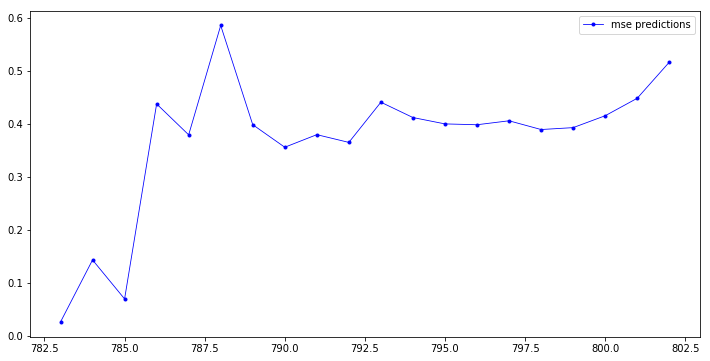

In [19]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(x,bp_ratio, 'b.-', label='mse predictions', lw=0.8)
# ax.plot(x,e_b, 'b-', label='mse baseline', lw=0.3)
ax.legend()

##### Rolling windows

In [20]:
df_act.set_index('ds', inplace=True)

In [21]:
rolling = df_act.rolling(5, center=True)

mean = rolling.mean()

ym = mean.acc_nr.values

ValueError: x and y must have same first dimension, but have shapes (20,) and (21,)

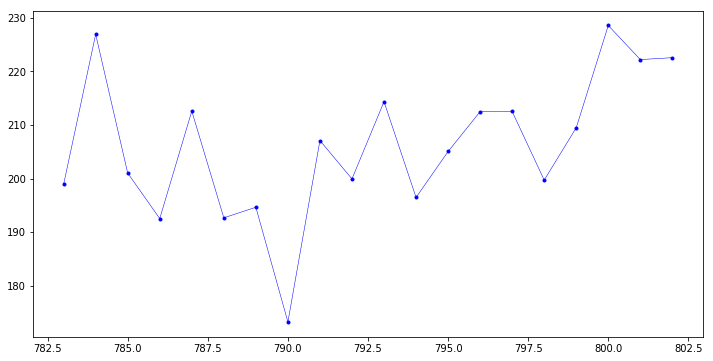

In [22]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(x,y, 'b.-', label='predictions', lw=0.5)
ax.plot(x,ym, 'r.-', label='actuals, smoothed', lw=0.5)
ax.set_ylim(0,300)
ax.legend()

In [ ]:
mean_squared_error(y[pd.notnull(ym)],ym[pd.notnull(ym)])